<a href="https://githubtocolab.com/borislevant/python4ml/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

# Linear Regression

[![scikit-learn logo](https://commons.wikimedia.org/wiki/File:Scikit_learn_logo_small.svg)](https://scikit-learn.org/stable/)


In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

sns.set(
    style='ticks',
    context='talk',
    palette='Set1'
)

# Supervised learning

Supervised learning (SL) is a machine learning paradigm for problems where the available data consists of labelled examples, meaning that each data point contains features (covariates) and an associated label. The goal of supervised learning algorithms is learning a function that maps feature vectors (inputs) to labels (output), based on example input-output pairs. It infers a function from labeled training data consisting of a set of training examples. In supervised learning, each example is a pair consisting of an input object (typically a vector) and a desired output value (also called the supervisory signal). A supervised learning algorithm analyzes the training data and produces an inferred function, which can be used for mapping new examples. An optimal scenario will allow for the algorithm to correctly determine the class labels for unseen instances. This requires the learning algorithm to generalize from the training data to unseen situations in a "reasonable" way (see inductive bias). This statistical quality of an algorithm is measured through the so-called generalization error.

The most popular python toolbox for solution of Machine Learning problems is *scikit-learn*. To install it just type
```
pip install scikit-learn
```

All supervised estimators (models) in *scikit-learn* (both for regression and classification problems) implement a `fit(X, y)` method to fit the model and a `predict(X)` method that, given unlabeled observations `X`, returns the predicted labels `y`.

In this section we will learn how to train, use and estimate the *linear regression*. We will work with 2 datasets
* healthexp - for the simple 1-parameter `X` linear regression
* pinguins - for the more sofisticated models, involving multiple parameter/polynomial regression


# Life Expectancy vs. Spendings

Let's load the data set from the standard set of Seaborn package


In [8]:
df = sns.load_dataset('healthexp')
df.head(5)

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


The simplest model for such predictions is the linear model
$$
\widehat{y} = ax + b
$$
where here $x$ is the aces and $y$ is the points won.
The model parameters can be interpreted as follows:
- the intercept $b$ is the estimate for points won if 0 points were aced, and
- the slope $a$ is the estimate for the linear increase in points won for every additional ace.

We then look for $a$ and $b$ such that this loss function is minimized:
$$
loss = \sum_{i=1}^n{(y-\widehat{y})^2}
$$
Note that this loss is just the square of the residuals -- the difference between the true value $y$ and the predicted value $\widehat{y}$.

Let's use Scikit-learn to fit a linear regression model.

We import the model, and format the data the way scikit-learn likes it.

In [27]:
X = df.loc[df.Country=='Canada', 'Spending_USD'].values.reshape((-1, 1))
y = df.loc[df.Country=='Canada', 'Life_Expectancy'].values
lin_model = linear_model.LinearRegression()
lin_model.fit(X, y)
print("R^2: {:.4f}".format(lin_model.score(X, y)))

R^2: 0.9321


$R^2$ is the proportion of variation in $y$ explained by the linear regression. 93% is quite a good fit. Let's look at the plots

Text(0.5, 1.0, 'Country: Japan')

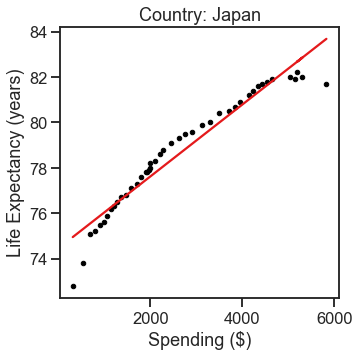

In [31]:
plt.figure(figsize=(5, 5))
plt.plot(X, y, '.k')
plt.plot(X, lin_model.predict(X))
plt.xlabel('Spending ($)')
plt.ylabel('Life Expectancy (years)')
plt.title('Country: Japan')

We can easily get the parameters of the model in the following way:

In [36]:
print('The parameters of the model y=ax+b are')
print(f'a={lin_model.coef_[0]}')
print(f'b={lin_model.intercept_}')

The parameters of the model y=ax+b are
a=0.0015828050279988568
b=74.45575471973685


# References

- Scikit-learn [supervised learning tutorial](http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html).
- [Tuning meta-parameters](http://scikit-learn.org/stable/modules/grid_search.html#grid-search) with cross validation.

# Futher exercise

- [Regression with a linear model](../exercises/linear-model.ipynb)
- [Classification with a logistic model](../exercises/logistic-tennis.ipynb)